In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, re

In [12]:
data = pd.read_csv('data/20171123001pose.csv')

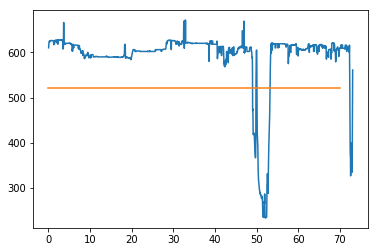

In [29]:
lower = data[data.leftX != -1]['leftY'].values+data[data.leftX != -1]['leftH'].values
plt.plot(data[data.leftX != -1]['time'].values, lower)
thresh = lower.mean() - lower.std()
plt.plot([0,70],[thresh,thresh])

In [35]:
l_lower = data[data.leftX != -1]['leftY'].values+data[data.leftX != -1]['leftH'].values
r_lower = data[data.leftX != -1]['rightY'].values+data[data.leftX != -1]['rightH'].values
l_thresh = l_lower.mean() - l_lower.std()
r_thresh = r_lower.mean() - r_lower.std()

l_pool = []
r_pool = []
for index in range(len(data)):
    item = data.iloc[index]
    if item['leftY'] != -1:
        if item['leftY'] + item['leftH'] < l_thresh:
            l_pool.append(item['time'])
    
    if item['rightY'] != -1:
        if item['rightY'] + item['rightH'] < r_thresh:
            r_pool.append(item['time'])
            
group_consecutive(l_pool)

[array([ 49.040581,  49.080582,  49.120583,  49.160583,  49.200584,
         49.240585,  49.280586,  49.320587,  49.360584,  49.400585,
         49.440586,  49.480587,  49.520588,  49.560589,  49.60059 ,
         49.640591,  49.680588,  49.720589,  49.76059 ,  49.800591,
         50.080593,  50.120594,  50.160595,  50.200596,  50.240597,
         50.280598,  50.320599,  50.3606  ,  50.400597,  50.440598,
         50.480598,  50.520599,  50.5606  ,  50.600601,  50.640602,
         50.680603,  50.7206  ,  50.760601,  50.800602,  50.840603,
         50.880604,  50.920605,  50.960606,  51.000607,  51.040607,
         51.080605,  51.120605,  51.160606,  51.200607,  51.240608,
         51.280609,  51.32061 ,  51.360611,  51.400612,  51.440609,
         51.48061 ,  51.520611,  51.560612,  51.600613,  51.640614,
         51.680614,  51.720615,  51.760612,  51.800613,  51.840614,
         51.880615,  51.920616,  51.960617,  52.000618,  52.040619,
         52.08062 ,  52.120617,  52.160618,  52.

In [33]:
def group_consecutive(a,step=1):
    ''' group consecutive numbers in an array
        modified from https://zhuanlan.zhihu.com/p/29558169'''
    return np.split(a, np.where(np.diff(a) > step)[0] + 1)